In [7]:
import sys

# sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("C:/Users/jaesu/AppData/Local/Programs/Python/Python312/Lib/site-packages")
# sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt 
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [10]:
import os

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

algorithms = ["bitonic", "sample", "merge"]
directories = ["cali_files/bitonic_cali", "cali_files/sample_cali", "cali_files/merge_cali"]
num_procs = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
input_size = 67108864

# gather all the specific files from each algorithm's cali directory
cali_files = []
for alg in algorithms:
    for n in num_procs:
        filename = "p" + str(n) + "-a" + str(input_size) + "-random-" + alg + ".cali" # "cali_files/" + alg + "/
        directory = "cali_files/" + alg + "_cali"
        filepath = os.path.join(directory, filename)
        if os.path.exists(filepath):
            cali_files.append(filepath)
        else:
            print(filepath + " is missing")

# Create Thicket object
tk = th.Thicket.from_caliperreader(cali_files)

(2/2) Creating Thicket: 100%|██████████| 29/29 [00:00<00:00, 195.74it/s]


In [12]:
tk.metadata_column_to_perfdata("algorithm")
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("input_type")
tk.metadata_column_to_perfdata("num_procs")

tk.dataframe = tk.dataframe.reset_index().set_index(["node", "algorithm", "input_size", "input_type", "num_procs"]).sort_index()

In [14]:
tk.dataframe

profile  \
node                                              algorithm    input_size input_type num_procs               
{'name': 'MPI_Comm_dup', 'type': 'function'}      bitonic_sort 67108864   random     1          3198089918   
                                                                                     2          3417537591   
                                                                                     4           583701721   
                                                                                     8          1104918005   
                                                                                     16         2790365674   
                                                                                     32          481965401   
                                                                                     64         1279078013   
                                                                                     128        1708982855   
                                                                                     256         769857602   
                                                                                     512         938294732   
                                                  merge        67108864   random     1          1590458032   
                                                                                     2           552635815   
                                                                                     4          1189729939   
                                                                                     8          3076102217   
                                                                                     16         3650228440   
                                                                                     32         2488318724   
                                                                                     64         3048126537   
                                                                                     128        1332787518   
                                                                                     256        1451938112   
                                                                                     512        3569737060   
                                                  sample       67108864   random     1           367208668   
                                                                                     2          2953471753   
                                                                                     4          1101709635   
                                                                                     8          4061093327   
                                                                                     16         2602539726   
                                                                                     32         2288969474   
                                                                                     64          602176331   
                                                                                     128        1358262257   
                                                                                     256         869473594   
                                                                                     512        3051613126   
{'name': 'MPI_Finalize', 'type': 'function'}      bitonic_sort 67108864   random     1          3198089918   
                                                                                     2          3417537591   
                                                                                     4           583701721   
                                                                                     8          1104918005   
                                                                                     16         2790365674   
                             

In [16]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:profile.mpi,spot:region.count,spot:time.exclusive,spot:time.variance,launchdate,libraries,cmdline,cluster,algorithm,programming_model,data_type,size_of_data_type,input_size,input_type,num_procs,scalability,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,
367208668,2.11.0,1,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p1-a67108864-random-sample.cali,true,true,true,true,1729846173,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./sample, 67108864, random]",c,sample,mpi,int,4,67108864,random,1,weak,16,handwritten
481965401,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p32-a67108864-random-bitonic.cali,true,true,true,true,1729359033,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./bitonic, 67108864, random]",c,bitonic_sort,mpi,int,4,67108864,random,32,weak,16,handwritten
552635815,2.11.0,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,results/p2-a67108864-random-merge.cali,true,true,true,true,1729909768,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./merge, 67108864, random]",c,merge,mpi,int,4,67108864,random,2,strong,16,handwritten
583701721,2.11.0,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p4-a67108864-random-bitonic.cali,true,true,true,true,1729359027,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./bitonic, 67108864, random]",c,bitonic_sort,mpi,int,4,67108864,random,4,weak,16,handwritten
602176331,2.11.0,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p64-a67108864-random-sample.cali,true,true,true,true,1729843955,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./sample, 67108864, random]",c,sample,mpi,int,4,67108864,random,64,weak,16,handwritten
769857602,2.11.0,256,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p256-a67108864-random-bitonic.cali,true,true,true,true,1729359053,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./bitonic, 67108864, random]",c,bitonic_sort,mpi,int,4,67108864,random,256,weak,16,handwritten
869473594,2.11.0,256,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p256-a67108864-random-sample.cali,true,true,true,true,1729845077,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./sample, 67108864, random]",c,sample,mpi,int,4,67108864,random,256,weak,16,handwritten
938294732,2.11.0,512,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p512-a67108864-random-bitonic.cali,true,true,true,true,1729359053,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./bitonic, 67108864, random]",c,bitonic_sort,mpi,int,4,67108864,random,512,weak,16,handwritten
1101709635,2.11.0,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p4-a67108864-random-sample.cali,true,true,true,true,1729758523,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./sample, 67108864, random]",c,sample,mpi,int,4,67108864,random,4,weak,16,handwritten


In [18]:
plt.rcParams.update({"font.size": 18})

In [20]:
    def plot_pandas(df, title, xlabel, ylabel):
        plot = df.plot(kind="line", 
            marker='o', 
            title=title, 
            xlabel=xlabel,
            ylabel=ylabel, 
            figsize=(15,7),
            grid=True
        )
        plot.legend(title="Algorithm", labels=df.columns.get_level_values('algorithm').unique())
        return plot

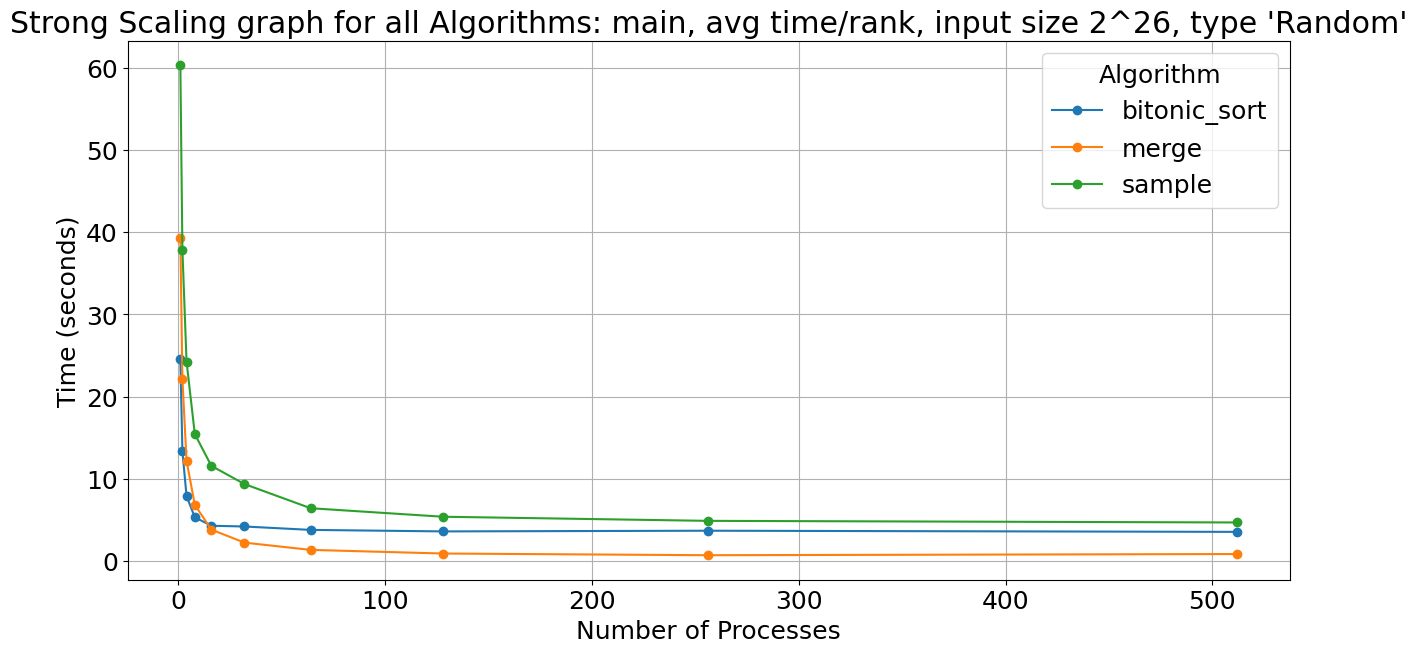

In [22]:
# graphs for main. comm, and comp_large
for node in tk.graph.traverse():
    if node.frame["name"] == 'main':
        df=(tk.dataframe.loc[node, "Max time/rank"])
        
        # df = (df.loc[df.index.get_level_values('input_size') == size])
        
        df = df.unstack(level="algorithm")
        df = df.unstack(level="input_size")
        df = df.unstack(level="input_type")
        
        plot_pandas(
            df,
            title="Strong Scaling graph for all Algorithms: Main, Avg time/rank, Input size 2^26, Type 'Random'",
            xlabel="Number of Processes",
            ylabel="Time (seconds)",
        )

        filename = f"./graphs/Strong_Scaling_All_Algs_main_avgTime_{input_size}_typeRandom.png"
        plt.savefig(filename)
        
        break
